**In this project, we aim to predict the most favorable restaurant locations in Bangalore based on customer ratings, facilitating strategic decision-making for restaurant owners and investors.**

### 1. Importing the Necessary Libraries

In [1]:
import pandas as pd  #to manipulate the data we use pandas 

import numpy as np   #NumPy can be used to perform a wide variety of mathematical operations on arrays.

import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive 
                                       # visualizations in Python. Matplotlib makes easy things easy and hard things possible.
    
import seaborn as sns     #Seaborn library is a widely popular data visualization library that is commonly used for 
                                         #data science and machine learning tasks.
from warnings import filterwarnings  ## filter the Warning 
filterwarnings('ignore')

### 2. Loading the Dataset


In [3]:
data=pd.read_csv("zomato.csv") #read the data from zomato dataset using pandans
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.columns #checking columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
data.shape

(51717, 17)

### 3. EDA [Exploratory Data Analysis]


### Removing unnecessary columns 

In [5]:
data['menu_item'].head() # this column does't have any information

0    []
1    []
2    []
3    []
4    []
Name: menu_item, dtype: object

In [6]:
data.dish_liked.head(2)

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
Name: dish_liked, dtype: object

In [7]:
data.dish_liked.isnull().sum() # this column has lots of null value 

28078

In [5]:
data=data.drop(['menu_item','url','phone','address','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

# if i can use  inplace = True it effect my origenal data

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### cheching information about data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [10]:
data.shape #51717 columns and 10 rows

(51717, 10)

### check duplicated

In [11]:
data.duplicated().sum() # checking duplicates records

16706

In [12]:
data[data.duplicated()] # show the duplicated record which we have

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out
2482,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
2483,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51633,Re:fuel- Aloft Bengaluru Cessna Business Park,No,No,NaN,0,Bellandur,"Cafe, Bakery","Bakery, Beverages, Cafe, Coffee, Desserts, San...","1,000",Dine-out
51637,The Crunch,No,No,3.3 /5,6,Brookefield,Beverage Shop,Beverages,300,Dine-out
51639,Kale Cafe,No,No,NaN,0,Brookefield,Quick Bites,"Fast Food, Kerala",100,Dine-out
51642,Basaveshwara Khanavali,No,No,NaN,0,Brookefield,Quick Bites,South Indian,200,Dine-out



### drop the duplicates 

In [7]:
data.drop_duplicates(keep='first',inplace=True) # inplace is true means it effect original data

In [8]:
data.shape

(35011, 10)

In [15]:
data.isnull().sum() #check the whether data has null value or not if it has null records then count the records

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

In [16]:
null_values = {i:data[i].isnull().sum() for i in data.columns} #it is same has privious code in deffirent way

null_values

{'name': 0,
 'online_order': 0,
 'book_table': 0,
 'rate': 3770,
 'votes': 0,
 'location': 14,
 'rest_type': 156,
 'cuisines': 33,
 'approx_cost(for two people)': 221,
 'listed_in(type)': 0}

In [17]:
empty_data = data.isnull().sum() #just i want to show only null value 
empty_data[empty_data>0]

rate                           3770
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
dtype: int64

In [18]:
data[data.isnull().any(axis=1)] #it shows the all null value 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery
...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,Dine-out
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Drinks & nightlife
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars



### visualization null values by using heatmap

<Axes: >

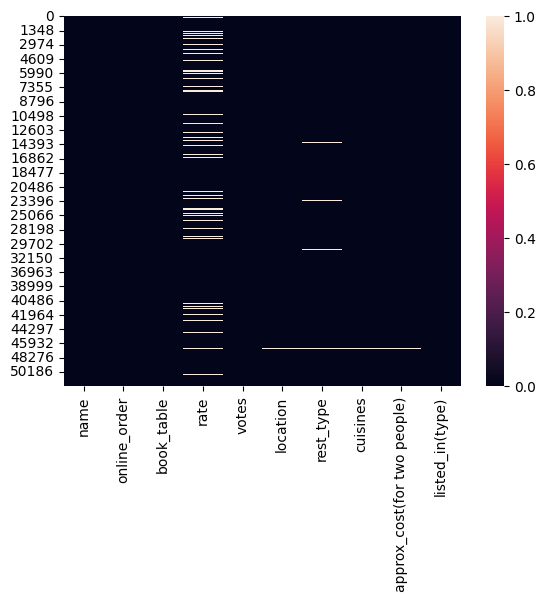

In [19]:
sns.heatmap(data.isnull())


# cleaning the Rate column


In [9]:
print("There are {} values are unique in Rate Columns".format(len(data["rate"].unique())))
                                #it gives the length of the unique value in the rate column

data["rate"].unique() #it shows unique value in the rate column

There are 65 values are unique in Rate Columns


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### i noted that i want chenge object datatype to float datatype and some string value "NEW","-" to Nan and i don't want that "/5"

In [10]:
def rate(data):                          #using function and function name is data
    if data == "NEW" or data == "-":     #if any columns have "NEW","-" it convert to nun
        return np.nan                    #NumPy NAN stands for not a number and is defined as a substitute for declaring value
                                                   #which are numerical values that are missing values in an array 
    else:                                   
        data = str(data).split("/")       # i split the data "/"
        data = data[0]                     
        return float(data)                  #it returns float

In [11]:
data["rate"].apply(rate) #here we can see i removed "/5" and i converted object to float because i should float type not object

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

In [12]:
data["rate"] = data["rate"].apply(rate)  # the result of the function i declare to rate column in original data

In [13]:
data["rate"].value_counts().index

Float64Index([3.9, 3.8, 3.7, 4.0, 4.1, 3.6, 3.5, 4.2, 3.4, 3.3, 4.3, 3.2, 3.1,
              4.4, 3.0, 4.5, 2.9, 2.8, 4.6, 2.7, 2.6, 4.7, 2.5, 4.8, 2.4, 4.9,
              2.3, 2.1, 2.2, 2.0, 1.8],
             dtype='float64')

**Fill null values in rate column using fillna**

In [14]:
#Now replace null value with the mean value that complete rate column

data["rate"] = data["rate"].fillna(data["rate"].mean()) #fillna file the all nun values

## rate column has zero null value now

In [26]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [27]:
data.rest_type.nunique()

93

In [28]:
data[data.rest_type.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
999,Mughlai Kitchen,Yes,No,3.500000,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Eat & Joy Restaurant,Yes,No,3.000000,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1376,Kababish Restaurant,Yes,No,3.600000,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1565,Goli Vada Pav No 1,No,No,3.730491,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1637,Ammi's Biryani,No,No,2.400000,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...,...
50838,Vijayawada Heights,Yes,No,3.200000,8,Whitefield,NaN,North Indian,600,Delivery
50978,Snack Itt,No,No,3.730491,0,Whitefield,NaN,Bakery,200,Desserts
51130,Pindi Bangalore,Yes,No,3.730491,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900,Dine-out
51195,Special Biryani House,Yes,No,3.200000,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out


In [29]:
data['rest_type'].mode()[0]

'Quick Bites'

In [15]:
 #  Take most occured category in that vairable (.mode())
Mode_Category =data['rest_type'].mode()[0]

In [16]:
# Replace NAN values with most occured category in actual vairable
data['rest_type'].fillna(Mode_Category,inplace=True)

In [17]:
data.rest_type.isna().sum()

0

In [18]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                        0
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [34]:
data[data.location.isnull()] # here i check that "location	rest_type	cuisines	approx_cost(for two people)" 
                                #these all columns have null values. i should remove those null values

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1662,Papa Khan Rasoi,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
13693,Mohabbat Desi Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
16351,Desi Chatkara,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
26432,New Taj Biryani Centre,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
26519,AB's - Absolute Barbecues,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Buffet
27672,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
28611,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
33457,La Lunch Box,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
40354,The Happy Vegetarian,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
40556,Risalo Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Cafes


In [19]:
data.dropna(subset=['location'],inplace=True)

In [36]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        19
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [20]:
data[data.cuisines.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
438,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Delivery
440,Lassi Spot,Yes,No,3.300000,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
759,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Dine-out
4037,Chai Point,Yes,No,3.730491,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200,Delivery
6887,Noodle Oodle,Yes,No,3.600000,9,Whitefield,Delivery,NaN,400,Delivery
6897,Taste of Chettinad,Yes,No,3.730491,0,Whitefield,Delivery,NaN,400,Delivery
7277,Watheen Nuts,No,No,3.730491,0,Whitefield,"Takeaway, Delivery",NaN,400,Delivery
7555,Delhi Food Factory,Yes,No,3.730491,0,Marathahalli,Delivery,NaN,500,Delivery
13591,Delhi Food Factory,Yes,No,3.730491,0,Electronic City,Delivery,NaN,500,Delivery
22974,Delhi Food Factory,No,No,3.730491,0,Kumaraswamy Layout,Delivery,NaN,500,Delivery


In [21]:
Mode_Category =data['cuisines'].mode()[0]
data['cuisines'].fillna(Mode_Category,inplace=True)

In [22]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [40]:
data[data['approx_cost(for two people)'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1768,Innate,No,No,3.730491,0,JP Nagar,Delivery,Beverages,NaN,Delivery
1795,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3069,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3774,The Hub - Ibis Bengaluru,No,No,3.900000,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3954,North Indian Kitchen,No,No,3.200000,13,HSR,Takeaway,North Indian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...
50764,Innate,No,No,3.730491,0,Whitefield,Delivery,Beverages,NaN,Delivery
50940,Cinnabon,No,No,4.000000,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts
51247,Mast Kalandar,No,No,2.600000,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out
51271,Karavalli Food Court,No,No,3.200000,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out


In [23]:
# Rename columns

data.rename(columns = {"approx_cost(for two people)":"Cost2plate","listed_in(type)":"Type"},inplace = True)

In [24]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


## cleaning the Cost2plate column

In [43]:
data["Cost2plate"].unique() #show the unique values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [26]:
data['Cost2plate'].apply(remove_comma)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: Cost2plate, Length: 34997, dtype: float64

In [27]:
data['Cost2plate']=data['Cost2plate'].apply(remove_comma) # result data assigned to cost2plate column in the original data

**the Cost2plate column is cleaned now**

<Axes: >

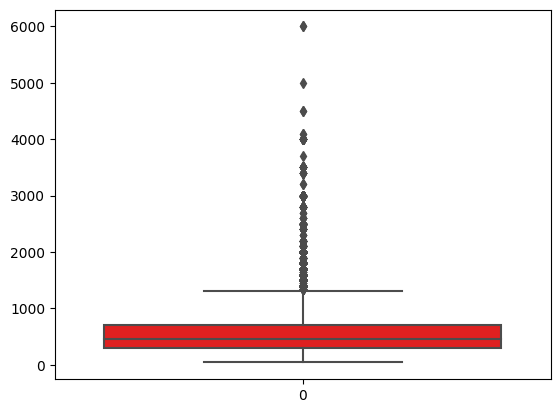

In [28]:
sns.boxplot(data.Cost2plate,color='red')

# i want to check outlies in my data

<Axes: >

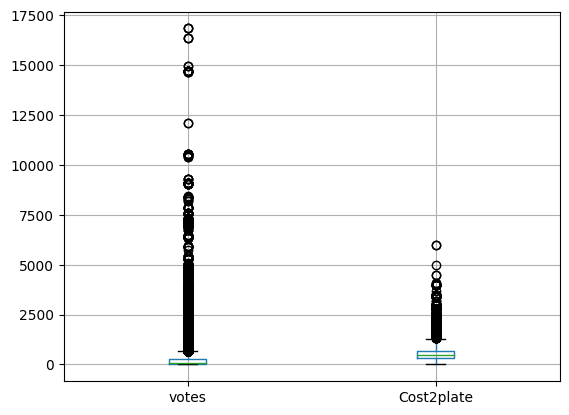

In [48]:
data.drop('rate', axis=1).boxplot()

In [29]:
# in the Cost2plate column has null values then i need to remove those 
Q1 = data.Cost2plate.quantile(0.25)
Q3 = data.Cost2plate.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

300.0 700.0
400.0


(-300.0, 1300.0)

In [50]:
data[(data.Cost2plate<lower_limit)|(data.Cost2plate>upper_limit)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
207,Chutney Chang,Yes,Yes,4.100000,2339,Jayanagar,Casual Dining,"North Indian, Chinese, BBQ",1500.0,Delivery
476,Brew Meister,Yes,Yes,4.100000,970,Jayanagar,"Microbrewery, Casual Dining","North Indian, Continental, Finger Food, Americ...",1500.0,Delivery
868,Barbeque Nation,No,Yes,4.700000,3845,JP Nagar,Casual Dining,"North Indian, European, Mediterranean, BBQ, Kebab",1600.0,Buffet
1080,Moksha,Yes,No,3.600000,42,Kanakapura Road,"Casual Dining, Bar","Chinese, North Indian, Andhra, South Indian",1500.0,Delivery
1135,BANGALORE BOX,Yes,Yes,4.200000,611,BTM,"Casual Dining, Bar","Asian, Continental, Finger Food",1500.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.900000,77,Whitefield,"Fine Dining, Bar",Finger Food,2000.0,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.730491,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars


In [30]:
data= data[(data.Cost2plate>lower_limit)&(data.Cost2plate<upper_limit)]

<Axes: >

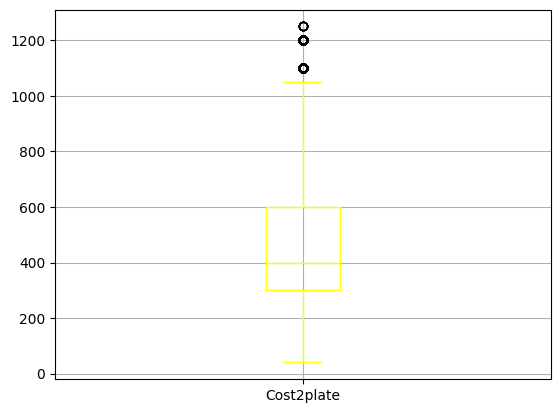

In [31]:
data.drop(['rate','votes'], axis=1).boxplot(color="yellow")

In [32]:
data.reset_index(drop='First',inplace=True)

<Axes: >

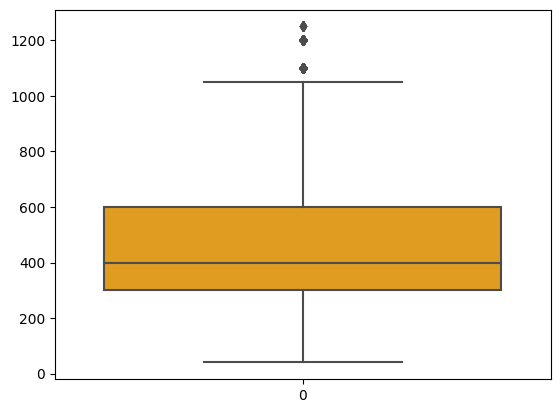

In [33]:
sns.boxplot(data.Cost2plate,color='orange')

In [34]:
data["Cost2plate"] = data["Cost2plate"].fillna(data["Cost2plate"].median())

In [35]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2plate      0
Type            0
dtype: int64

**these is no null values in my data**

## all the datatype is set now

In [57]:
data.info()
# all the datatype set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31662 entries, 0 to 31661
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31662 non-null  object 
 1   online_order  31662 non-null  object 
 2   book_table    31662 non-null  object 
 3   rate          31662 non-null  float64
 4   votes         31662 non-null  int64  
 5   location      31662 non-null  object 
 6   rest_type     31662 non-null  object 
 7   cuisines      31662 non-null  object 
 8   Cost2plate    31662 non-null  float64
 9   Type          31662 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


In [58]:
data.head(2) #if u check above all datatype has been done and no null values 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet


In [59]:
data.shape

(31662, 10)

# cleaning  and clustering the rest_type column



In [60]:
data['rest_type'].value_counts() # all those rest have less like 1,2 ,etc.
                                                #what i can do is i will make cluster to make 1 to 1000 as other

Quick Bites                    12265
Casual Dining                   6705
Cafe                            2554
Delivery                        1509
Dessert Parlor                  1491
                               ...  
Microbrewery, Casual Dining        1
Mess, Quick Bites                  1
Quick Bites, Kiosk                 1
Sweet Shop, Dessert Parlor         1
Dessert Parlor, Food Court         1
Name: rest_type, Length: 79, dtype: int64

In [36]:
rest_type=data['rest_type'].value_counts()  #i assigned data to rest_type variable
rest_type

Quick Bites                    12265
Casual Dining                   6705
Cafe                            2554
Delivery                        1509
Dessert Parlor                  1491
                               ...  
Microbrewery, Casual Dining        1
Mess, Quick Bites                  1
Quick Bites, Kiosk                 1
Sweet Shop, Dessert Parlor         1
Dessert Parlor, Food Court         1
Name: rest_type, Length: 79, dtype: int64

In [37]:
rest_type_lessthan1000=rest_type[rest_type<1000]  # filtered the data lessthan 1000 and assign
rest_type_lessthan1000

Bakery                         736
Casual Dining, Bar             550
Beverage Shop                  488
Food Court                     424
Bar                            287
                              ... 
Microbrewery, Casual Dining      1
Mess, Quick Bites                1
Quick Bites, Kiosk               1
Sweet Shop, Dessert Parlor       1
Dessert Parlor, Food Court       1
Name: rest_type, Length: 73, dtype: int64

In [38]:
def handle_rest_type(value):                   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if(value in rest_type_lessthan1000):                                        # by using if statement
        return 'others'
    else:
        return value

In [39]:
data['rest_type']=data['rest_type'].apply(handle_rest_type) # same like assigned the data

In [40]:
data['rest_type'].value_counts()

Quick Bites           12265
Casual Dining          6705
others                 5928
Cafe                   2554
Delivery               1509
Dessert Parlor         1491
Takeaway, Delivery     1210
Name: rest_type, dtype: int64

In [66]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# cleaning and clustering the location column



In [67]:
data['location'].value_counts() #i will make clustering like lessthan 300

BTM                     2475
Whitefield              1758
HSR                     1724
Marathahalli            1590
Indiranagar             1516
                        ... 
Nagarbhavi                 4
Sankey Road                4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [41]:
data['location'].value_counts().unique()

array([2475, 1758, 1724, 1590, 1516, 1344, 1338, 1205, 1162, 1058, 1049,
        823,  591,  571,  567,  542,  533,  532,  531,  528,  485,  463,
        459,  449,  428,  421,  411,  366,  349,  316,  315,  313,  288,
        262,  250,  205,  179,  176,  173,  165,  164,  160,  157,  154,
        147,  134,  128,  117,  116,  115,  106,  103,   96,   95,   84,
         81,   79,   75,   72,   64,   56,   54,   52,   51,   48,   42,
         40,   37,   34,   21,   19,   18,   17,   16,   13,   12,   10,
          6,    5,    4,    2,    1], dtype=int64)

In [42]:
#same like previous

location=data['location'].value_counts()
location
location_less300=location[location<300]

def handle_location(value):
    if(value in location_less300):
        return 'others'
    else:
        return value
    

In [43]:
data['location']=data['location'].apply(handle_location) # assigned
data['location'].value_counts()

others                   4965
BTM                      2475
Whitefield               1758
HSR                      1724
Marathahalli             1590
Indiranagar              1516
Koramangala 5th Block    1344
JP Nagar                 1338
Jayanagar                1205
Electronic City          1162
Bellandur                1058
Bannerghatta Road        1049
Sarjapur Road             823
Brookefield               591
Banashankari              571
New BEL Road              567
Kalyan Nagar              542
Koramangala 7th Block     533
Koramangala 1st Block     532
Koramangala 6th Block     531
Brigade Road              528
Koramangala 4th Block     485
Malleshwaram              485
Frazer Town               463
Basavanagudi              459
Rajajinagar               449
Banaswadi                 428
Ulsoor                    421
Kammanahalli              411
Church Street             366
Old Airport Road          349
Richmond Road             316
Residency Road            315
MG Road   

In [71]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# cleaning and clustering the cuisines column



In [72]:
data['cuisines'].value_counts()  #cluster just 1 to 100 values

North Indian                                   1839
North Indian, Chinese                          1554
South Indian                                   1157
Bakery, Desserts                                591
Biryani                                         560
                                               ... 
Bengali, Chinese, Seafood                         1
Sandwich, Fast Food, Burger, Rolls                1
Burger, Chinese, Fast Food, Pizza, Sandwich       1
Steak, Beverages                                  1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2442, dtype: int64

In [73]:
data['cuisines'].value_counts().unique()

array([1839, 1554, 1157,  591,  560,  485,  475,  447,  445,  387,  304,
        260,  252,  238,  226,  212,  199,  190,  186,  179,  174,  169,
        164,  159,  154,  149,  147,  145,  142,  139,  135,  131,  130,
        129,  126,  125,  123,  120,  119,  115,  114,  110,  109,  105,
        104,   99,   98,   97,   96,   92,   88,   87,   82,   81,   76,
         75,   73,   72,   71,   68,   67,   65,   64,   63,   62,   61,
         60,   58,   57,   56,   55,   54,   53,   52,   51,   50,   49,
         48,   46,   45,   44,   43,   42,   41,   40,   39,   38,   37,
         36,   35,   34,   33,   32,   31,   30,   29,   28,   27,   26,
         25,   24,   23,   22,   21,   20,   19,   18,   17,   16,   15,
         14,   13,   12,   11,   10,    9,    8,    7,    6,    5,    4,
          3,    2,    1], dtype=int64)

In [44]:
# same as previous

cuisines=data['cuisines'].value_counts()
cuisines
cuisines_less150=cuisines[cuisines<150]

def handle_cuisines(value):
    if(value in cuisines_less150):
        return 'others'
    else:
        return value

In [45]:
data['cuisines']=data['cuisines'].apply(handle_cuisines) #assigned
data['cuisines'].value_counts()

others                                 20140
North Indian                            1839
North Indian, Chinese                   1554
South Indian                            1157
Bakery, Desserts                         591
Biryani                                  560
Fast Food                                485
South Indian, North Indian, Chinese      475
Desserts                                 447
Cafe                                     445
Bakery                                   387
Ice Cream, Desserts                      304
Chinese                                  304
Mithai, Street Food                      260
Chinese, North Indian                    252
North Indian, Chinese, Biryani           238
Desserts, Ice Cream                      226
North Indian, South Indian               212
North Indian, South Indian, Chinese      212
South Indian, North Indian               199
North Indian, Biryani                    190
Desserts, Beverages                      186
Street Foo

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31662 entries, 0 to 31661
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31662 non-null  object 
 1   online_order  31662 non-null  object 
 2   book_table    31662 non-null  object 
 3   rate          31662 non-null  float64
 4   votes         31662 non-null  int64  
 5   location      31662 non-null  object 
 6   rest_type     31662 non-null  object 
 7   cuisines      31662 non-null  object 
 8   Cost2plate    31662 non-null  float64
 9   Type          31662 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


In [46]:
data['Type'].value_counts()

Delivery              15502
Dine-out              11529
Desserts               2428
Cafes                  1201
Drinks & nightlife      357
Buffet                  349
Pubs and bars           296
Name: Type, dtype: int64

# Data is Cleaned now, Lets go to to Visualization




In [47]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plate', 'Type'],
      dtype='object')

## 4.1) Histograms

Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

In [48]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


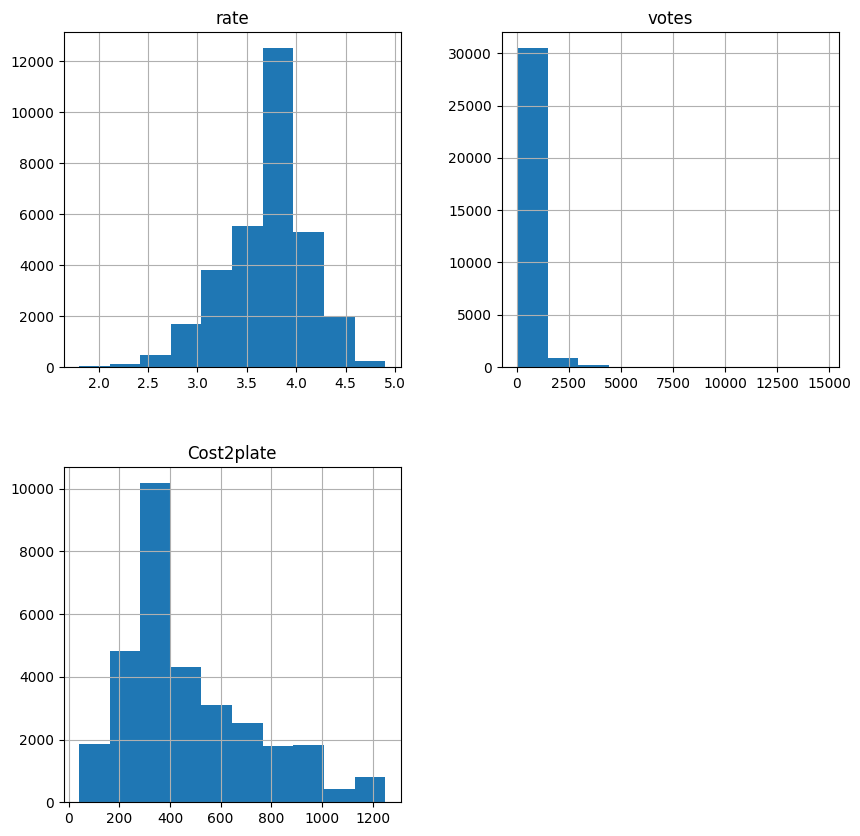

In [80]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))    
plt.show()

# Count Plot of Various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'Brigade Road'),
  Text(22, 0, 'Church Street'),
  Text(23, 0, 'Residency Road'),
  Text(24, 0, 'MG Road'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Malleshwaram'),
  Text(27, 0, '

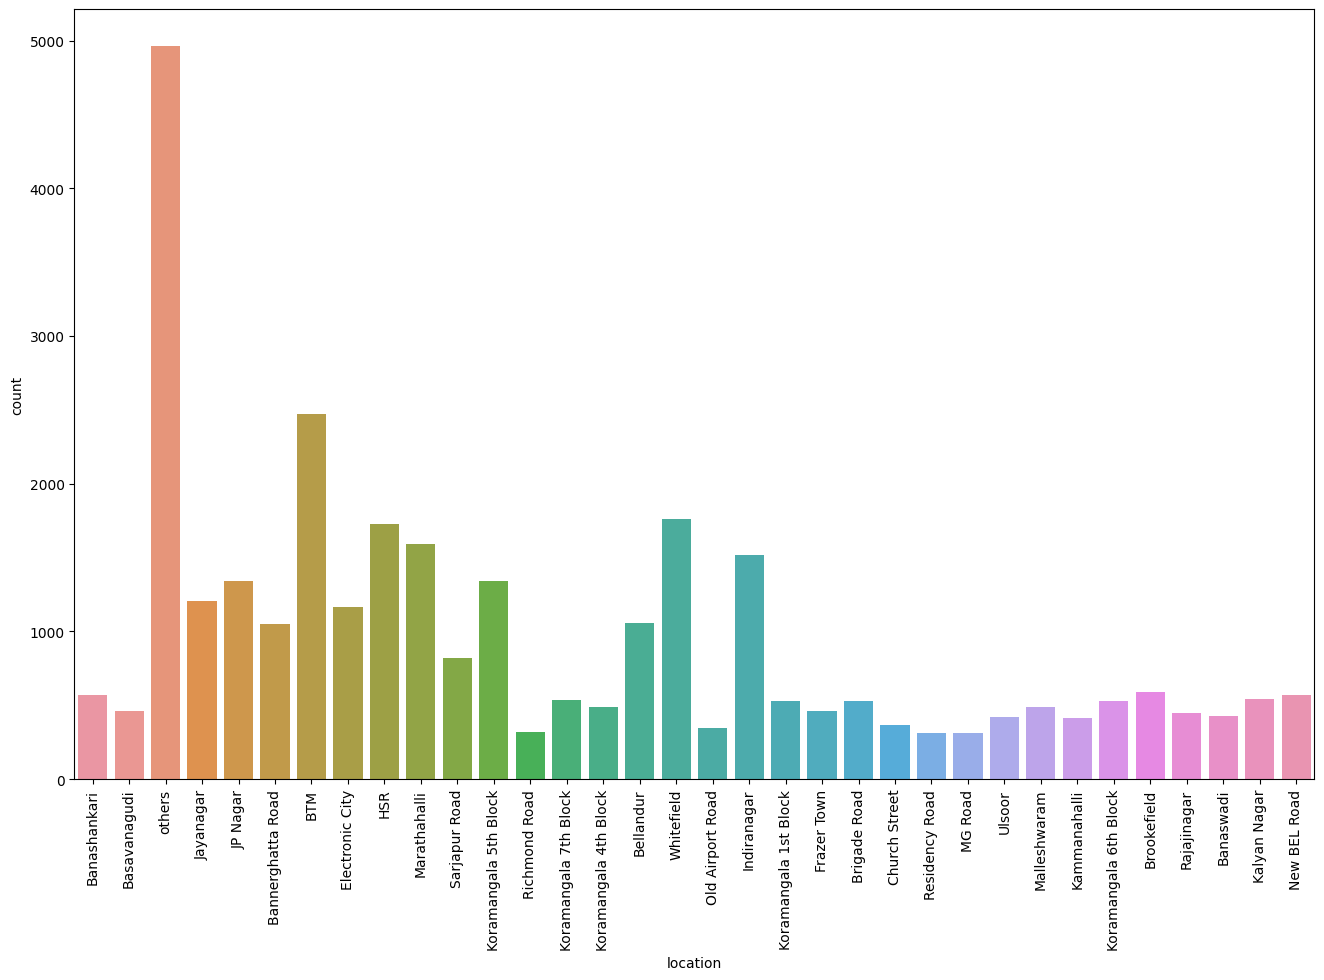

In [81]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data,x='location')
plt.xticks(rotation=90)

**Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.**

# Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

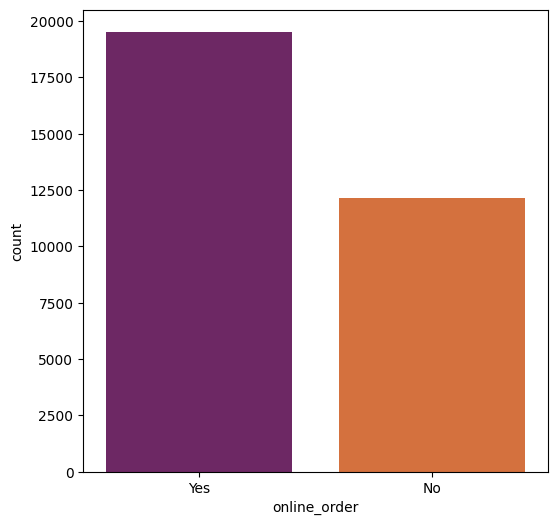

In [82]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='online_order', palette = 'inferno')

**The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.**

# Visualizing book_table



<Axes: xlabel='book_table', ylabel='count'>

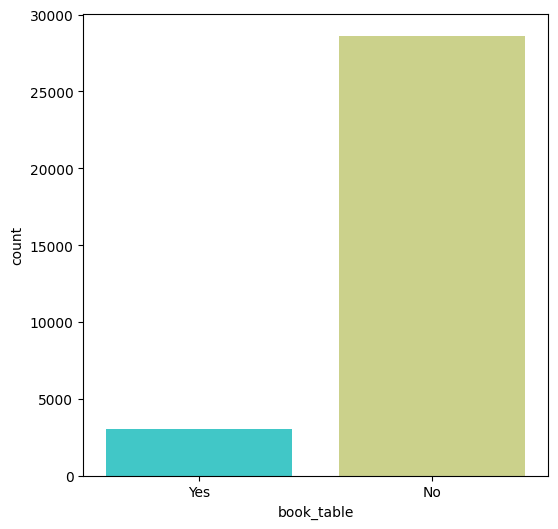

In [83]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='book_table', palette = 'rainbow')

**the analysis reveals a comparatively lower count of "book_table" instances with the choice "No."**

# Visualizing Online Order vs Rate


<Axes: xlabel='online_order', ylabel='rate'>

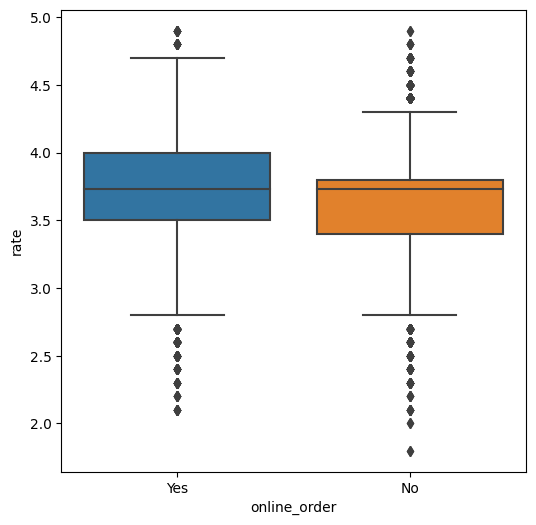

In [84]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate',data = data,orient='v')

# Visualizing Book Table vs Rate



<Axes: xlabel='book_table', ylabel='rate'>

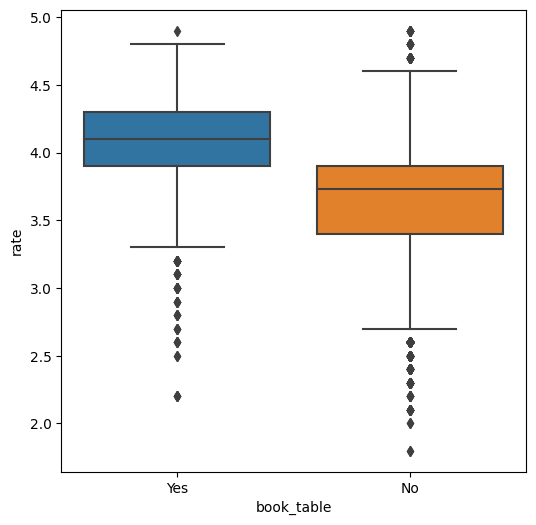

In [85]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = data)

# Visualizing Online Order Facility, Location Wise



In [86]:
df1 = data.groupby(['location','online_order'])['name'].count() # i am going to grouping my data location wise and i 
                                                                              #going to create new csv formate.
    
#to_csv() function converts DataFrame into CSV data. We can pass a file object to write the CSV data into a file.
                                     #Otherwise, the CSV data is returned in the string format.       
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     788  1687
Banashankari            258   313
Banaswadi               209   219
Bannerghatta Road       399   650
Basavanagudi            178   281
Bellandur               413   645
Brigade Road            219   309
Brookefield             206   385
Church Street           160   206
Electronic City         613   549
Frazer Town             200   263
HSR                     433  1291
Indiranagar             502  1014
JP Nagar                522   816
Jayanagar               366   839
Kalyan Nagar            215   327
Kammanahalli            171   240
Koramangala 1st Block   141   391
Koramangala 4th Block   226   259
Koramangala 5th Block   422   922
Koramangala 6th Block   174   357
Koramangala 7th Block   177   356
MG Road                 152   161
Malleshwaram            183   302
Marathahalli            588  1002
New BEL Road            235   332
Old Airport Road        153   196
Rajajinagar             201   248
Residency Road          175   140
Richmond Road           188   128
Sarjapur Road           239   584
Ulsoor                  105   316
Whitefield              751  1007
others                 2166  2799

<Axes: xlabel='location'>

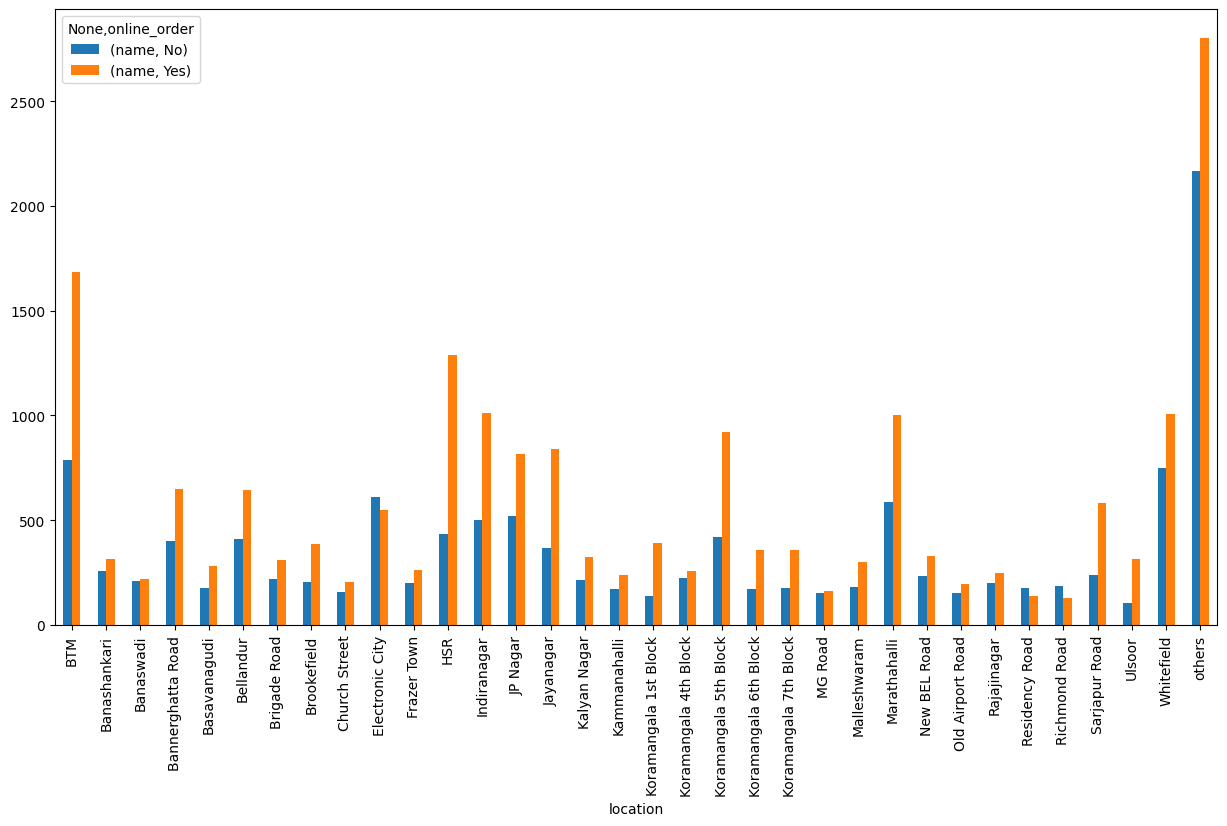

In [87]:
df1.plot(kind = 'bar', figsize = (15,8))

**Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.**

# Visualizing Book Table Facility, Location Wise



In [88]:
df2 = data.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2373  102
Banashankari            530   41
Banaswadi               422    6
Bannerghatta Road       975   74
Basavanagudi            451    8
Bellandur              1022   36
Brigade Road            474   54
Brookefield             525   66
Church Street           253  113
Electronic City        1106   56
Frazer Town             455    8
HSR                    1562  162
Indiranagar            1273  243
JP Nagar               1150  188
Jayanagar              1017  188
Kalyan Nagar            473   69
Kammanahalli            383   28
Koramangala 1st Block   497   35
Koramangala 4th Block   327  158
Koramangala 5th Block   981  363
Koramangala 6th Block   477   54
Koramangala 7th Block   476   57
MG Road                 251   62
Malleshwaram            447   38
Marathahalli           1508   82
New BEL Road            520   47
Old Airport Road        335   14
Rajajinagar             420   29
Residency Road          275   40
Richmond Road           271   45
Sarjapur Road           781   42
Ulsoor                  390   31
Whitefield             1632  126
others                 4598  367

<Axes: xlabel='location'>

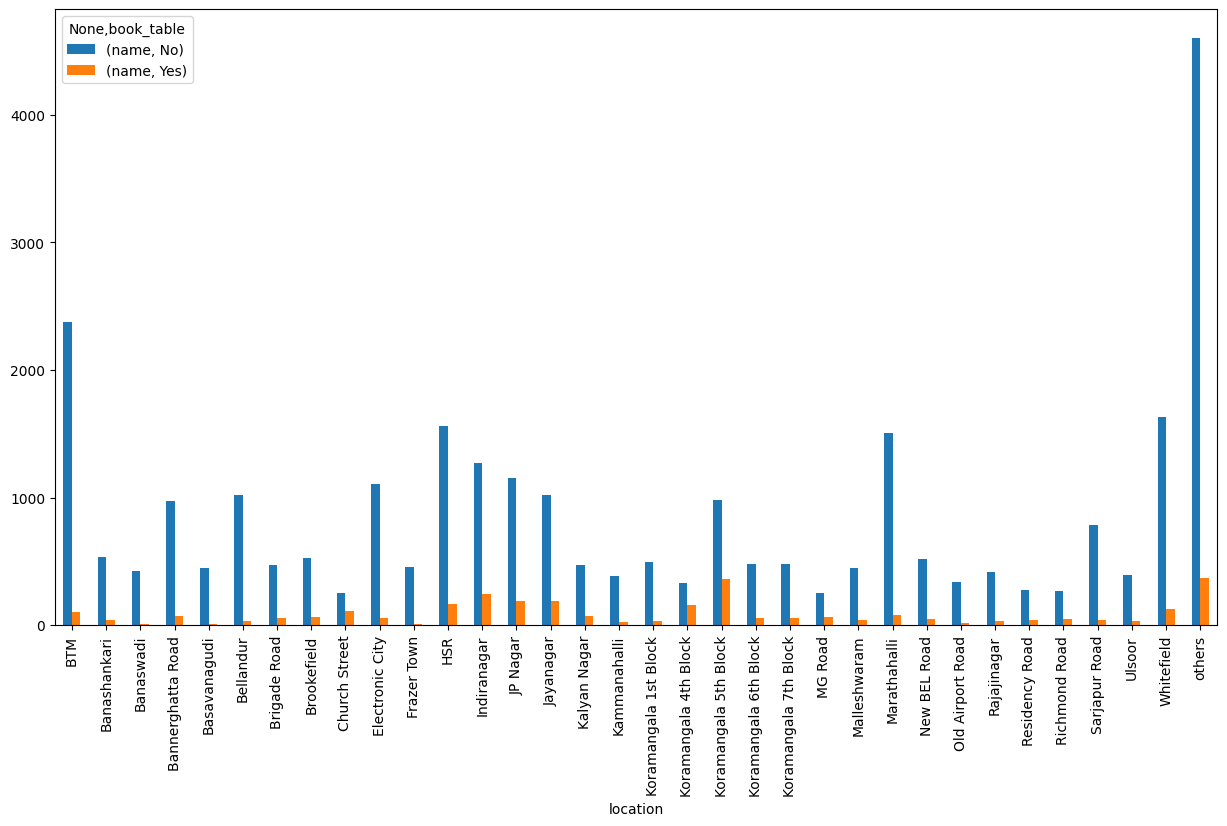

In [89]:
df2.plot(kind = 'bar', figsize = (15,8))

**Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.**

# Visualizing Types of Restaurents vs Rate



<Axes: xlabel='Type', ylabel='rate'>

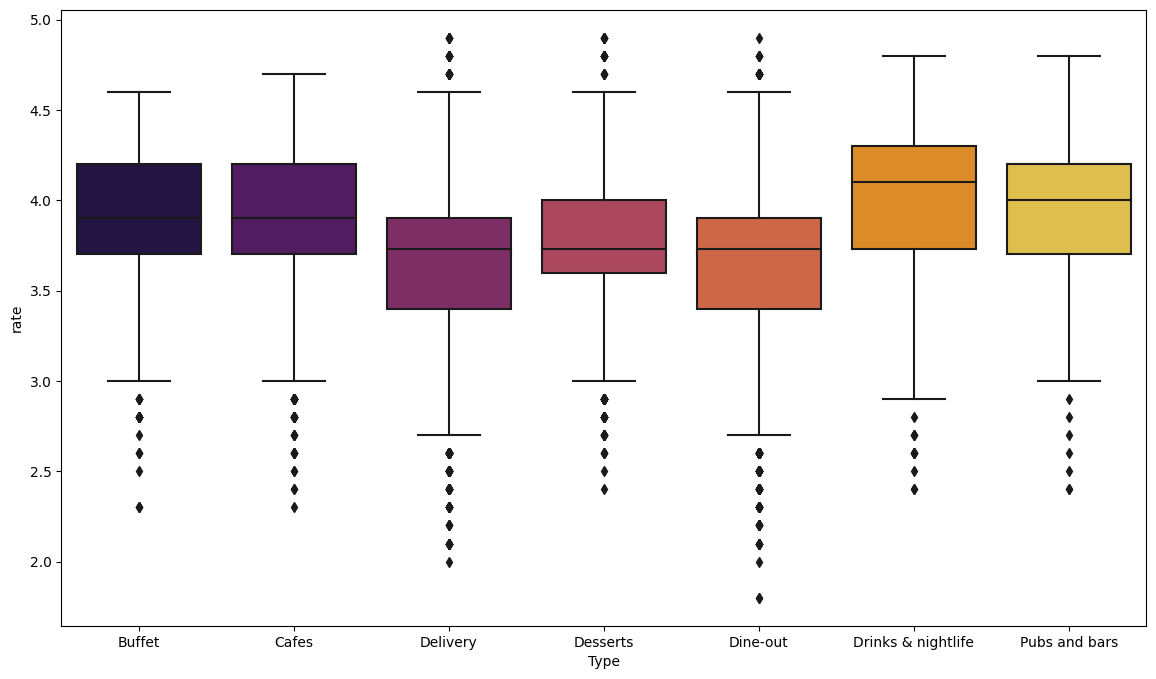

In [90]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = data, palette = 'inferno',orient='v')

**An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

# Grouping Types of Restaurents, location wise



In [91]:
df3 = data.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                        9    46     1422      110      862   
Banashankari               5    24      244       46      246   
Banaswadi                  0    13      159       19      234   
Bannerghatta Road          8    27      510       92      403   
Basavanagudi               4     8      195       45      206   
Bellandur                 14    34      505       72      423   
Brigade Road              10    24      212       55      213   
Brookefield                6    17      296       42      228   
Church Street             10    44      110       21      141   
Electronic City           14    24      545       71      485   
Frazer Town                1    10      266       46      139   
HSR                       12    41     1064      110      476   
Indiranagar               23    96      783      136      432   
JP Nagar                  22    41      621      104      525   
Jayanagar                 15    50      544      118      471   
Kalyan Nagar               5    24      182       45      282   
Kammanahalli               1    14      159       18      216   
Koramangala 1st Block      0    14      319       32      152   
Koramangala 4th Block      9    43      223       38      129   
Koramangala 5th Block     18   113      575      131      443   
Koramangala 6th Block      9    30      272       44      160   
Koramangala 7th Block      6    30      220       69      188   
MG Road                    5    46       99       37      104   
Malleshwaram               5    24      186       63      197   
Marathahalli              16    30      873       93      569   
New BEL Road               2    29      276       34      217   
Old Airport Road           2     5      171       35      131   
Rajajinagar                7     4      196       44      191   
Residency Road             4    19      103       33      123   
Richmond Road             23    13      110       37      133   
Sarjapur Road              6    19      447       77      265   
Ulsoor                     0    29      200       33      150   
Whitefield                17    46      909      127      635   
others                    61   170     2506      351     1760   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   13            13  
Banashankari                           6             0  
Banaswadi                              3             0  
Bannerghatta Road                      7             2  
Basavanagudi                           1             0  
Bellandur                              4             6  
Brigade Road                           8             6  
Brookefield                            2             0  
Church Street                         23            17  
Electronic City                       12            11  
Frazer Town                            0             1  
HSR                                   11            10  
Indiranagar                           18            28  
JP Nagar                              21             4  
Jayanagar                              7             0  
Kalyan Nagar                           4             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  5            10  
Koramangala 4th Block                 24            19  
Koramangala 5th Block                 32            32  
Koramangala 6th Block                  8             8  
Koramangala 7th Block                  7            13  
MG Road                               13             9  
Malleshwaram                           5             5  
Marathahalli                           9             0  
New BEL Road          

<Axes: xlabel='location'>

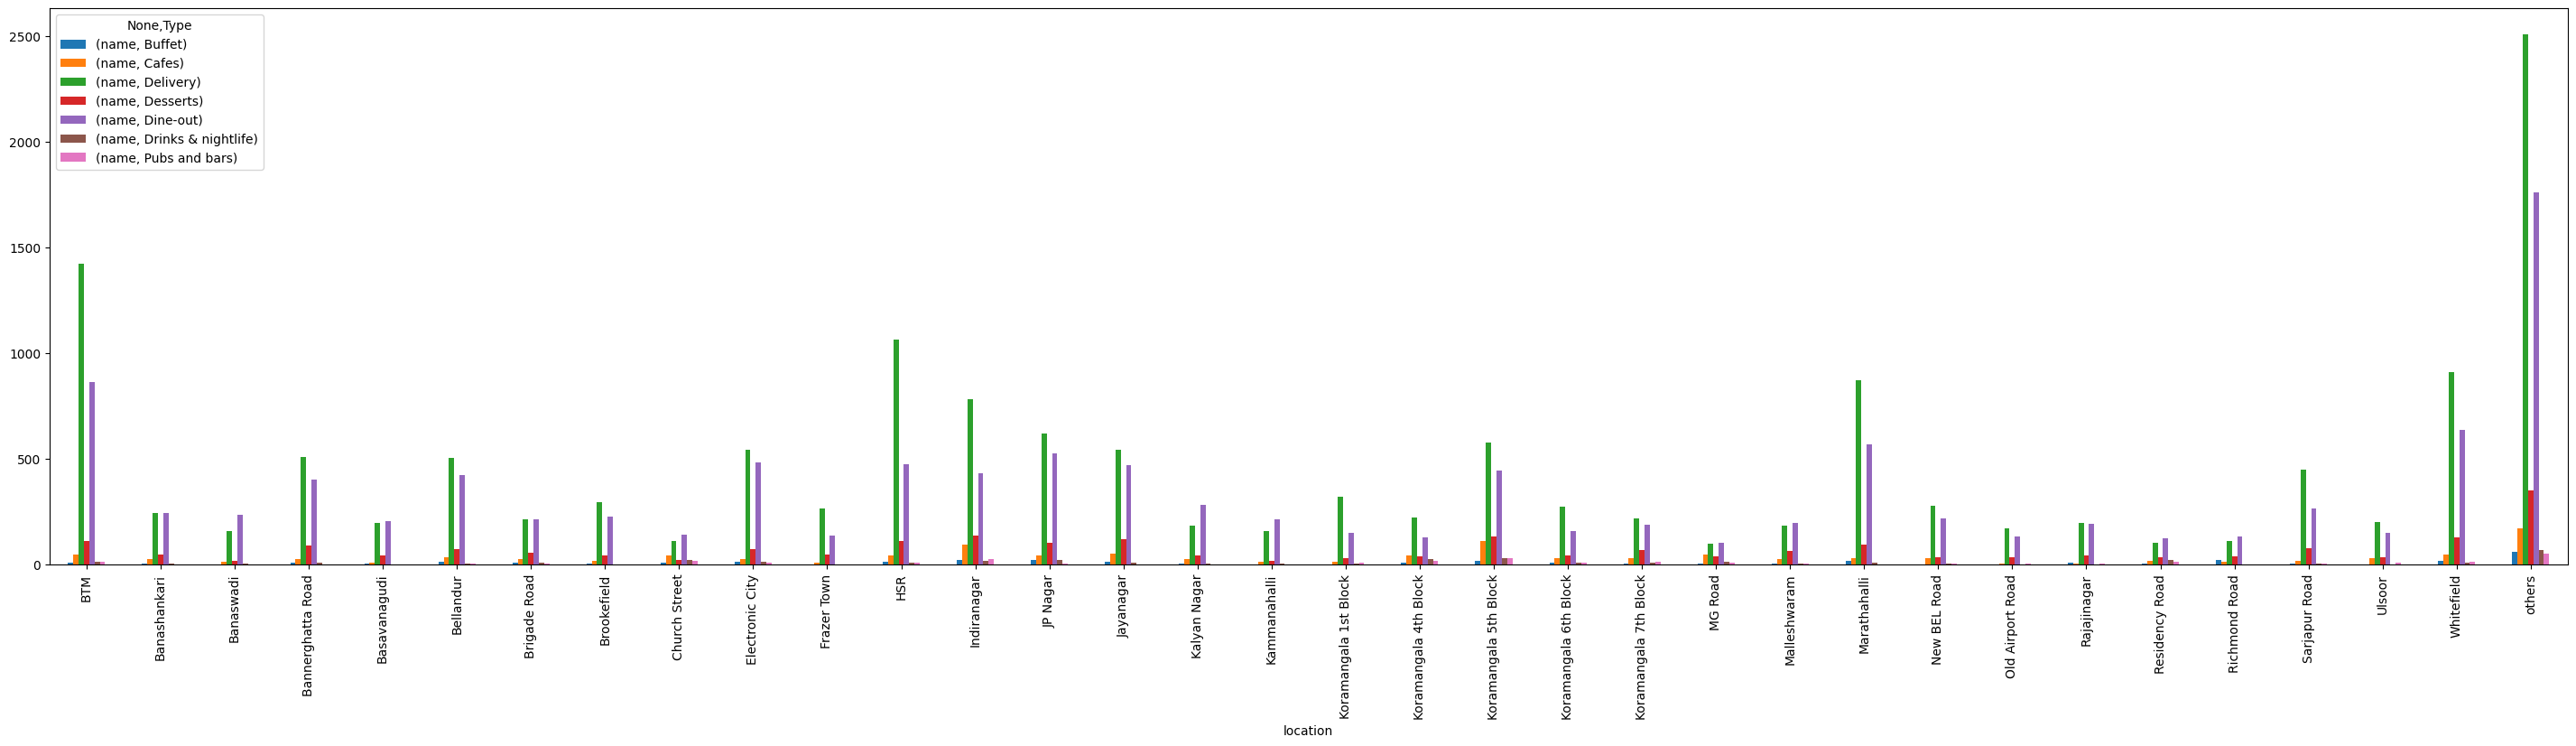

In [92]:
df3.plot(kind = 'bar', figsize = (36,8))

**Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.**

# No. of Votes, Location Wise



In [93]:
df4 = data[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,1290425
others,738429
Indiranagar,663420
Koramangala 4th Block,444602
HSR,394580


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Indiranagar'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'HSR'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Jayanagar'),
  Text(7, 0, 'BTM'),
  Text(8, 0, 'Church Street'),
  Text(9, 0, 'Whitefield'),
  Text(10, 0, 'Koramangala 6th Block'),
  Text(11, 0, 'Marathahalli'),
  Text(12, 0, 'Koramangala 7th Block'),
  Text(13, 0, 'Bannerghatta Road'),
  Text(14, 0, 'New BEL Road'),
  Text(15, 0, 'Residency Road'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'Bellandur'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Brookefield'),
  Text(20, 0, 'MG Road'),
  Text(21, 0, 'Banashankari'),
  Text(22, 0, 'Malleshwaram'),
  Text(23, 0, 'Electronic City'),
  Text(24, 0, 'Kalyan Nagar'),
  Text(25, 0, 'Sarjapur Road'),
  Text(26, 0, 'Frazer Town'),
  Text

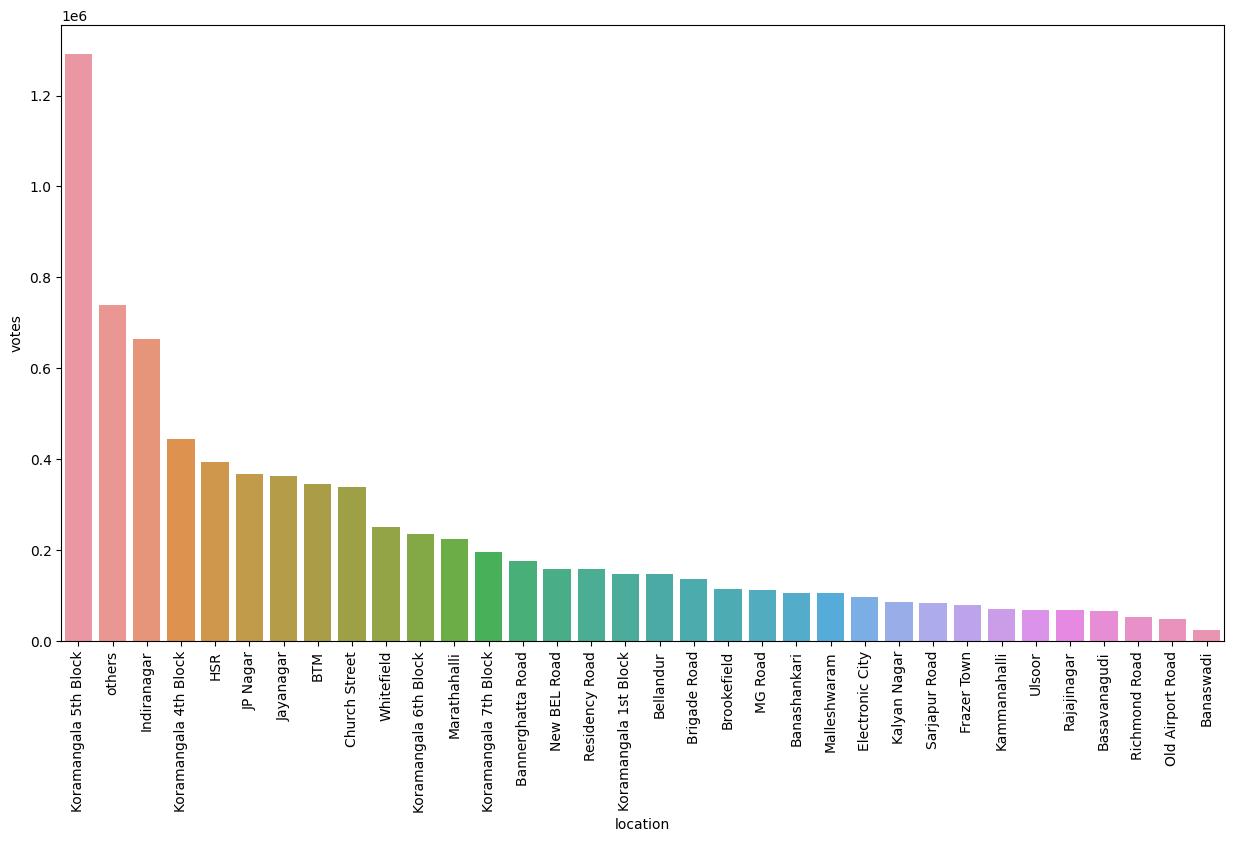

In [94]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5, x = df5.index, y='votes')
plt.xticks(rotation = 90)

**"Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.**

# Visualizing Top Cuisines



In [95]:
df6 = data[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,6621788
North Indian,388310
"North Indian, Chinese",183393
South Indian,110109
Cafe,70102


In [96]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,388310
"North Indian, Chinese",183393
South Indian,110109
Cafe,70102
Desserts,58243


#### 1) Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.

#### 2) The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.

#### 3) Conversely, the analysis reveals a comparatively lower count of "Table_order" instances with the choice "No."

#### 4) Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.

#### 5) Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.

#### 6) **An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

#### 7) Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.

#### 8) Finally, "Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.

# visualixzation has been completed

In [97]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [50]:
data['rate'].value_counts()

3.730491    4986
3.900000    2607
3.700000    2488
3.800000    2436
3.600000    2145
4.000000    2081
4.100000    1981
3.500000    1764
3.400000    1615
3.300000    1506
3.200000    1278
4.200000    1257
3.100000    1042
4.300000     953
3.000000     725
4.400000     655
2.900000     556
2.800000     423
4.500000     346
2.700000     216
2.600000     179
4.600000     129
2.500000      70
2.400000      58
4.700000      55
2.300000      37
4.800000      26
2.100000      19
4.900000      13
2.200000      12
1.800000       2
2.000000       2
Name: rate, dtype: int64

In [49]:
rate=data['rate']
rate

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
31657    2.800000
31658    3.700000
31659    3.730491
31660    2.500000
31661    3.730491
Name: rate, Length: 31662, dtype: float64

In [51]:
rate

# Define bin edges (boundaries)

bin_edges = [0,2.500000 ,3.500000 ,4.500000,5]

# Define bin labels for each interval
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Use the cut() function to create bins
binned_data = pd.cut(rate, bins=bin_edges, labels=bin_labels)


In [52]:

# Create a DataFrame with original data and binned data
DF= pd.DataFrame({'Rate': binned_data})

print(DF)

         Rate
0        High
1        High
2        High
3        High
4        High
...       ...
31657  Medium
31658    High
31659    High
31660     Low
31661    High

[31662 rows x 1 columns]


In [53]:
# i create new column as Rating and i insert my DF data into that column.
data['Rating']=DF

In [54]:
#i want to remove my rate column because i don't need that columns now
data.drop('rate',axis=1,inplace=True)

In [55]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,High
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,High
2,San Churro Cafe,Yes,No,918,Banashankari,others,others,800.0,Buffet,High
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,High
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,High


## Label encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
LE= LabelEncoder()
data['location']=LE.fit_transform(data['location'])

In [58]:
data['rest_type']=LE.fit_transform(data['rest_type'])

In [59]:
data['cuisines']=LE.fit_transform(data['cuisines'])
data['Type']=LE.fit_transform(data['Type'])

In [60]:
data

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,Yes,Yes,775,1,1,27,800.0,0,High
1,Spice Elephant,Yes,No,787,1,1,27,800.0,0,High
2,San Churro Cafe,Yes,No,918,1,6,27,800.0,0,High
3,Addhuri Udupi Bhojana,No,No,88,1,4,24,300.0,0,High
4,Grand Village,No,No,166,4,1,27,600.0,0,High
...,...,...,...,...,...,...,...,...,...,...
31657,Keys Cafe - Keys Hotel,No,No,161,32,6,27,1200.0,6,Medium
31658,The Farm House Bar n Grill,No,No,34,32,6,27,800.0,6,High
31659,Topsy Turvey,No,No,0,32,6,27,900.0,6,High
31660,Bhagini,No,No,81,32,6,27,800.0,6,Low


In [61]:
print('online_order',data.online_order.nunique())
print('book_table',data.book_table.nunique())
print('Rating',data.Rating.nunique())

online_order 2
book_table 2
Rating 4


In [62]:
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())
print('Rating---------->','\n',data.Rating.unique())

rest_type----------> ['Yes' 'No']
type----------> 
 ['Yes' 'No']
Rating----------> 
 ['High', 'Very High', 'Medium', 'Low']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


Label Encoding (Ordinal Encoding)     ---  
OHE (Nominal Encoding)                ---

In [63]:
data.replace({'Low':0,'Medium':1,'High':2,'Very High':3},inplace=True)

In [64]:
data.replace({'Yes':0,'No':1},inplace=True)

In [65]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,0,0,775,1,1,27,800.0,0,2
1,Spice Elephant,0,1,787,1,1,27,800.0,0,2
2,San Churro Cafe,0,1,918,1,6,27,800.0,0,2
3,Addhuri Udupi Bhojana,1,1,88,1,4,24,300.0,0,2
4,Grand Village,1,1,166,4,1,27,600.0,0,2


In [115]:
print('Rating---------->','\n',data.Rating.unique())
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())

Rating----------> 
 [2, 3, 1, 0]
Categories (4, int64): [0 < 1 < 2 < 3]
rest_type----------> [0 1]
type----------> 
 [0 1]


In [66]:
data.drop(['name'],axis=1,inplace=True) #axis=1 is drop column axis=0 drop row
data.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,0,0,775,1,1,27,800.0,0,2
1,0,1,787,1,1,27,800.0,0,2
2,0,1,918,1,6,27,800.0,0,2
3,1,1,88,1,4,24,300.0,0,2
4,1,1,166,4,1,27,600.0,0,2


In [67]:
data.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,31662.000000,31662.000000,31662.000000,31662.000000,31662.000000,31662.000000,31662.000000,31662.000000
mean,0.383046,0.904239,251.610669,17.550028,3.312299,22.243004,480.762018,2.816183
std,0.486137,0.294269,682.727956,11.200367,1.936127,7.667983,259.474123,1.095517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,1.000000,9.000000,9.000000,1.000000,18.000000,300.000000,2.000000
50%,0.000000,1.000000,46.000000,16.000000,4.000000,27.000000,400.000000,2.000000
75%,1.000000,1.000000,201.000000,30.000000,4.000000,27.000000,600.000000,4.000000
max,1.000000,1.000000,14726.000000,33.000000,6.000000,27.000000,1250.000000,6.000000


## Now i will be backuping the data

In [68]:
data_backup = data.copy(deep=True)

# Split the dataframe into x & y

In [69]:
# Separate object for target feature 
y= data['Rating']

# Separate object for Predictors 
X = data.drop('Rating',axis=1)

In [120]:
X.head(3)

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
0,0,0,775,1,1,27,800.0,0
1,0,1,787,1,1,27,800.0,0
2,0,1,918,1,6,27,800.0,0


In [71]:
y.head(2)

0    2
1    2
Name: Rating, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [70]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (31662, 8), Dependent Features Shape = (31662,)


# StandardScaler

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [74]:
X.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,3.166200e+04,3.166200e+04,3.166200e+04,3.166200e+04,3.166200e+04,3.166200e+04,3.166200e+04,3.166200e+04
mean,-7.181280e-18,-1.813273e-16,-1.795320e-18,1.436256e-16,1.974852e-17,2.154384e-17,1.256724e-17,1.597835e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-7.879506e-01,-3.072883e+00,-3.685430e-01,-1.566940e+00,-1.710813e+00,-2.900809e+00,-1.698701e+00,-2.570684e+00
25%,-7.879506e-01,3.254273e-01,-3.553604e-01,-7.633824e-01,-1.194310e+00,-5.533491e-01,-6.966586e-01,-7.450330e-01
50%,-7.879506e-01,3.254273e-01,-3.011652e-01,-1.383930e-01,3.552000e-01,6.203810e-01,-3.112576e-01,-7.450330e-01
75%,1.269115e+00,3.254273e-01,-7.413124e-02,1.111586e+00,3.552000e-01,6.203810e-01,4.595443e-01,1.080618e+00
max,1.269115e+00,3.254273e-01,2.120115e+01,1.379438e+00,1.388207e+00,6.203810e-01,2.964651e+00,2.906269e+00


# Splitting the data into Training data and Test data

In [75]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
      # test size is 80% data is training and 20% data is testing
    #Random state ensures that the splits that you generate are reproducible.
                              #this ensures that the random numbers are generated in the same order.

In [76]:
print(X.shape, X_train.shape,X_test.shape)

(31662, 8) (25329, 8) (6333, 8)


In [77]:
print(y.shape,y_train.shape,y_test.shape)

(31662,) (25329,) (6333,)


# SMOTE Techniques for Oversampling your Imbalance Data

pip install --upgrade imbalanced-learn


In [78]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

# Build the Logistic regression Algorithm

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [80]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 59.25251720803231
Test Accuracy 39.002052739617874


In [82]:
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

confusion_matrix:- 
 [[  34    7    3    0]
 [ 308 1408  164    4]
 [ 806 2123  998  429]
 [   2    0   17   30]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.03      0.77      0.06        44
           1       0.40      0.75      0.52      1884
           2       0.84      0.23      0.36      4356
           3       0.06      0.61      0.12        49

    accuracy                           0.39      6333
   macro avg       0.33      0.59      0.26      6333
weighted avg       0.70      0.39      0.40      6333



**In the logistic regression model, the training accuracy is 59.84%, while the test accuracy is 39.00%. These results indicate that the model's performance is suboptimal and may require further refinement or the exploration of different algorithms or features to achieve better predictive accuracy.**

# DecisionTree Algorithm

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.84498549405541 

Test Accuracy:- 91.56797726196115 

confusion_matrix:- 
 [[  29   10    5    0]
 [   5 1666  213    0]
 [  10  277 4062    7]
 [   0    1    6   42]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66        44
           1       0.85      0.88      0.87      1884
           2       0.95      0.93      0.94      4356
           3       0.86      0.86      0.86        49

    accuracy                           0.92      6333
   macro avg       0.83      0.83      0.83      6333
weighted avg       0.92      0.92      0.92      6333



**The Decision Tree model has a remarkable training accuracy of 99.77% but shows a lower test accuracy of 91.56%. This suggests potential overfitting to the training data and a need for regularization to improve generalization.**

# Random Forest Algorithm

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.84498549405541 

Test Accuracy:- 90.54160745302384 

confusion_matrix:- 
 [[  26    5   13    0]
 [   6 1654  224    0]
 [  11  324 4015    6]
 [   0    0   10   39]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.60      0.59      0.60        44
           1       0.83      0.88      0.86      1884
           2       0.94      0.92      0.93      4356
           3       0.87      0.80      0.83        49

    accuracy                           0.91      6333
   macro avg       0.81      0.80      0.80      6333
weighted avg       0.91      0.91      0.91      6333



**The Random Forest model has a remarkable training accuracy of 99.77% but shows a lower test accuracy of 90.45%. This suggests potential overfitting to the training data and a need for regularization to improve generalization.**

# K-Nearest Neighbors (KNN)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 92.30616075999772 

Test Accuracy:- 67.5035528185694 

confusion_matrix:- 
 [[  24   11    9    0]
 [  48 1295  541    0]
 [ 128 1266 2916   46]
 [   0    0    9   40]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.12      0.55      0.20        44
           1       0.50      0.69      0.58      1884
           2       0.84      0.67      0.74      4356
           3       0.47      0.82      0.59        49

    accuracy                           0.68      6333
   macro avg       0.48      0.68      0.53      6333
weighted avg       0.73      0.68      0.69      6333



 **The K-Nearest Neighbors (KNN) model achieved a training accuracy of 92.30% but exhibited a lower test accuracy of 67.30%. This indicates that the model may have difficulty generalizing to new, unseen data.**

# SVM(Support Vector Machine)

In [139]:
from sklearn.svm import SVC

# Create an SVM classifier
SVM = SVC()

# Train the SVM classifier on the training data
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 73.58495932646908 

Test Accuracy:- 42.523290699510504 

confusion_matrix:- 
 [[  32   10    2    0]
 [ 262 1497  109   16]
 [ 781 2221 1120  234]
 [   3    0    2   44]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.03      0.73      0.06        44
           1       0.40      0.79      0.53      1884
           2       0.91      0.26      0.40      4356
           3       0.15      0.90      0.26        49

    accuracy                           0.43      6333
   macro avg       0.37      0.67      0.31      6333
weighted avg       0.75      0.43      0.44      6333



**The Support Vector Machine (SVM) model yielded a training accuracy of 73.58% but demonstrated a lower test accuracy of 42.52%. These results suggest that the model might be struggling with overfitting or may require hyperparameter tuning to improve its generalization to new data.**

# kernels = Linear , RBF(Radial Basis Function), Poly, Sigmoid

In [140]:
# List of kernel names
kernel_names = ['linear', 'rbf', 'poly', 'sigmoid']

# Create SVM classifiers for different kernels in a single line
SVM_classifiers = {kernel: SVC(kernel=kernel).fit(X_train, y_train) for kernel in kernel_names}

# Evaluate and print results for each kernel
for kernel, SVM in SVM_classifiers.items():
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Kernel: linear
Train Accuracy: 60.52249843563343
Test Accuracy: 37.29669982630664
Confusion Matrix:
 [[  36    6    2    0]
 [ 280 1513   89    2]
 [ 914 2290  783  369]
 [   3    2   14   30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.82      0.06        44
           1       0.40      0.80      0.53      1884
           2       0.88      0.18      0.30      4356
           3       0.07      0.61      0.13        49

    accuracy                           0.37      6333
   macro avg       0.35      0.60      0.25      6333
weighted avg       0.73      0.37      0.36      6333



Kernel: rbf
Train Accuracy: 73.58495932646908
Test Accuracy: 42.523290699510504
Confusion Matrix:
 [[  32   10    2    0]
 [ 262 1497  109   16]
 [ 781 2221 1120  234]
 [   3    0    2   44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.73      0.06        44
           1       0

In my SVM experiments, you used multiple kernels:

1. **Linear Kernel:**
   - Training Accuracy: 60.52%
   - Test Accuracy: 37.29%

2. **RBF Kernel (Radial Basis Function):**
   - Training Accuracy: 73.58%
   - Test Accuracy: 42.52%

3. **Polynomial Kernel:**
   - Training Accuracy: 65.69%
   - Test Accuracy: 36.11%

4. **Sigmoid Kernel:**
   - Training Accuracy: 47.35%
   - Test Accuracy: 27.86%

Among these kernels, the RBF kernel performs the best on both the training and test sets, indicating better generalization compared to the others. However, there's still room for improvement in terms of test accuracy for all kernels. Further hyperparameter tuning or feature engineering may be necessary to enhance model performance.

# Naive Bayes classifier

In [141]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
NaiveBayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
NaiveBayes.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = NaiveBayes.predict(X_train)
y_test_pred = NaiveBayes.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 55.552079185391655 

Test Accuracy:- 33.12805937154587 

confusion_matrix:- 
 [[  31   13    0    0]
 [ 267 1557   41   19]
 [ 744 2582  480  550]
 [   7    6    6   30]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.03      0.70      0.06        44
           1       0.37      0.83      0.52      1884
           2       0.91      0.11      0.20      4356
           3       0.05      0.61      0.09        49

    accuracy                           0.33      6333
   macro avg       0.34      0.56      0.22      6333
weighted avg       0.74      0.33      0.29      6333



**In the Naive Bayes model, the training accuracy is 55.55%, while the test accuracy is 33.12%. These results suggest that the model may struggle to generalize to new, unseen data.** 

# AdaBoostClassifier, GradientBoostingClassifier

In [142]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create classifiers for different algorithms in a single line
classifiers = {
    'AdaBoost': AdaBoostClassifier().fit(X_train, y_train),
    'GradientBoosting': GradientBoostingClassifier().fit(X_train, y_train)
}

# Evaluate and print results for each classifier
for classifier_name, classifier in classifiers.items():
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print(f"Classifier: {classifier_name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Classifier: AdaBoost
Train Accuracy: 57.30416974799477
Test Accuracy: 52.992262750671095
Confusion Matrix:
 [[  19    2   23    0]
 [ 168  190 1513   13]
 [ 558  250 3108  440]
 [   2    0    8   39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.43      0.05        44
           1       0.43      0.10      0.16      1884
           2       0.67      0.71      0.69      4356
           3       0.08      0.80      0.14        49

    accuracy                           0.53      6333
   macro avg       0.30      0.51      0.26      6333
weighted avg       0.59      0.53      0.52      6333



Classifier: GradientBoosting
Train Accuracy: 86.051538767848
Test Accuracy: 70.89846834043897
Confusion Matrix:
 [[  27    4   13    0]
 [ 152 1373  356    3]
 [ 415  700 3047  194]
 [   1    0    5   43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.61      0.08        44

In my boosting experiments:

1. **AdaBoostClassifier:**
   - Training Accuracy:57.30%
   - Test Accuracy: 52.99%

2. **GradientBoosting:**
   - Training Accuracy: 86.05%
   - Test Accuracy: 70.89%

The GradientBoosting model outperforms AdaBoostClassifier in terms of both training and test accuracy, indicating better predictive power and generalization. It's important to note that boosting techniques like Gradient Boosting often yield stronger performance but may require more computational resources and hyperparameter tuning.)

# (XGB)Extreme Gradient Boosting

In [86]:
from xgboost import XGBClassifier

In [87]:
XGB=XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [88]:
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 95.70652483076398 

Test Accuracy:- 85.52029054160745 

confusion_matrix:- 
 [[  25    4   15    0]
 [   9 1477  398    0]
 [  19  463 3869    5]
 [   0    0    4   45]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.47      0.57      0.52        44
           1       0.76      0.78      0.77      1884
           2       0.90      0.89      0.90      4356
           3       0.90      0.92      0.91        49

    accuracy                           0.86      6333
   macro avg       0.76      0.79      0.77      6333
weighted avg       0.86      0.86      0.86      6333



**The XGBoost model exhibits strong performance with a training accuracy of 95.68% and a test accuracy of 85.34%. It demonstrates robust generalization, showcasing its effectiveness in predictive tasks with proper tuning and feature engineering.**

**1) The logistic regression model displays suboptimal performance with training accuracy at 54.36% and test accuracy at 35.6%, indicating the need for further refinement or exploration of alternative algorithms and features.**

**2) The Decision Tree boasts impressive training accuracy (99.82%) but exhibits potential overfitting with a lower test accuracy of 90.76%, highlighting the importance of regularization.**

**3) Similarly, the Random Forest achieves high training accuracy (99.82%) but struggles with overfitting, as evidenced by a test accuracy of 90.76%.**

**4) The K-Nearest Neighbors (KNN) model achieves 92.20% training accuracy but faces challenges in generalizing to new data, as reflected in its lower test accuracy of 67.80%.**

**5) The Support Vector Machine (SVM) attains 77.58% training accuracy but struggles with overfitting, as shown by the lower test accuracy of 46.95%, indicating a need for hyperparameter tuning.**

**6) Among SVM kernels, the RBF kernel performs best on both training (77.58%) and test (46.95%) data, displaying superior generalization. However, there is room for improvement in test accuracy through hyperparameter tuning and feature engineering.**

**7) The Naive Bayes model struggles to generalize, achieving a training accuracy of 46.88% and a test accuracy of 27.76%.**

**8) In boosting experiments, AdaBoostClassifier yields a training accuracy of 56.44% and a test accuracy of 54.10%, while GradientBoosting outperforms with training accuracy at 86.05% and test accuracy at 71.63%, emphasizing its predictive power with potential computational resource and hyperparameter tuning considerations.**

**9) The XGBoost model demonstrates robust performance with training accuracy at 95.66% and test accuracy at 85.47%, highlighting its effectiveness in predictive tasks with appropriate tuning and feature engineering.**

## The Decision Tree, Random Forest, and XGBoost models have shown promising performance and are now progressing to the next phase of our optimization process. This includes feature selection and fine-tuning of hyperparameters to further enhance their predictive capabilities.

# Parameter Tuning for Decision Tree

In [146]:
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [147]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [148]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'entropy'}

In [149]:
DM = DecisionTreeClassifier(criterion='entropy',min_samples_split= 15,min_samples_leaf= 1,max_features= 'log2',max_depth= 29)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 95.64963877353661 

Test Accuracy:- 83.68861519027317 

confusion_matrix:- 
 [[  24   10   10    0]
 [  22 1496  366    0]
 [  40  560 3741   15]
 [   0    0   10   39]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.28      0.55      0.37        44
           1       0.72      0.79      0.76      1884
           2       0.91      0.86      0.88      4356
           3       0.72      0.80      0.76        49

    accuracy                           0.84      6333
   macro avg       0.66      0.75      0.69      6333
weighted avg       0.85      0.84      0.84      6333



# Feature Selection Technique

In [150]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [151]:
print(selection.feature_importances_)

[0.01026274 0.02252713 0.52453827 0.16256965 0.04675017 0.0763425
 0.13948282 0.01752672]


<Axes: >

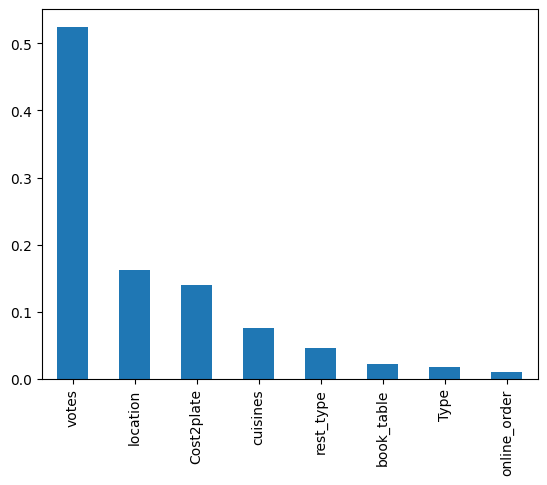

In [152]:
# let me plot feature importances 
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [153]:
X_imp = X[feat_importances.nlargest(5).index]
X_imp

,votes,location,Cost2plate,cuisines,rest_type
0,0.766627,-1.477656,1.230346,0.620381,-1.194310
1,0.784204,-1.477656,1.230346,0.620381,-1.194310
2,0.976084,-1.477656,1.230346,0.620381,1.388207
3,-0.239646,-1.477656,-0.696659,0.229138,0.355200
4,-0.125397,-1.209803,0.459544,0.620381,-1.194310
...,...,...,...,...,...
31657,-0.132721,1.290154,2.771950,0.620381,1.388207
31658,-0.318742,1.290154,1.230346,0.620381,1.388207
31659,-0.368543,1.290154,1.615747,0.620381,1.388207
31660,-0.249899,1.290154,1.230346,0.620381,1.388207


In [154]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [155]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

In [156]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.72552477387792 

Test Accuracy:- 93.28912048002526 

confusion_matrix:- 
 [[  33    8    3    0]
 [   8 1723  153    0]
 [   9  238 4104    5]
 [   0    0    1   48]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70        44
           1       0.88      0.91      0.89      1884
           2       0.96      0.94      0.95      4356
           3       0.91      0.98      0.94        49

    accuracy                           0.93      6333
   macro avg       0.85      0.90      0.87      6333
weighted avg       0.93      0.93      0.93      6333



# One more time Parameter Tuning

In [157]:
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [158]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [159]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 29,
 'criterion': 'entropy'}

In [160]:
DM = DecisionTreeClassifier(criterion='entropy',min_samples_split= 15,min_samples_leaf= 1,max_features= 'log2',max_depth= 29)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 96.53563911485294 

Test Accuracy:- 86.72035370282647 

confusion_matrix:- 
 [[  30    8    6    0]
 [  10 1605  269    0]
 [  28  508 3813    7]
 [   0    0    5   44]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.44      0.68      0.54        44
           1       0.76      0.85      0.80      1884
           2       0.93      0.88      0.90      4356
           3       0.86      0.90      0.88        49

    accuracy                           0.87      6333
   macro avg       0.75      0.83      0.78      6333
weighted avg       0.88      0.87      0.87      6333



**After conducting feature selection and parameter tuning, the Decision Tree model has shown substantial performance improvement, with a training accuracy of 99.72% and a test accuracy of 93.28%. These enhancements underscore the effectiveness of optimization techniques in enhancing model performance.**

# Parameter Tuning for Random Forest

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

In [162]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

# creating the random grid

random_grid = {'n_estimators':n_estimators,
               'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [163]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [164]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 47,
 'criterion': 'log_loss'}

In [165]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='log2',max_depth = 47,criterion= 'log_loss')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 97.88099436828034 

Test Accuracy:- 88.7730933207011 

confusion_matrix:- 
 [[  31    4    9    0]
 [   9 1625  250    0]
 [  12  412 3925    7]
 [   0    0    8   41]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.60      0.70      0.65        44
           1       0.80      0.86      0.83      1884
           2       0.94      0.90      0.92      4356
           3       0.85      0.84      0.85        49

    accuracy                           0.89      6333
   macro avg       0.80      0.83      0.81      6333
weighted avg       0.89      0.89      0.89      6333



# Feature Selection Technique

In [166]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [167]:
print(selection.feature_importances_)

[0.00997667 0.02388281 0.52636459 0.15998036 0.0450956  0.07523203
 0.14226312 0.01720482]


<Axes: >

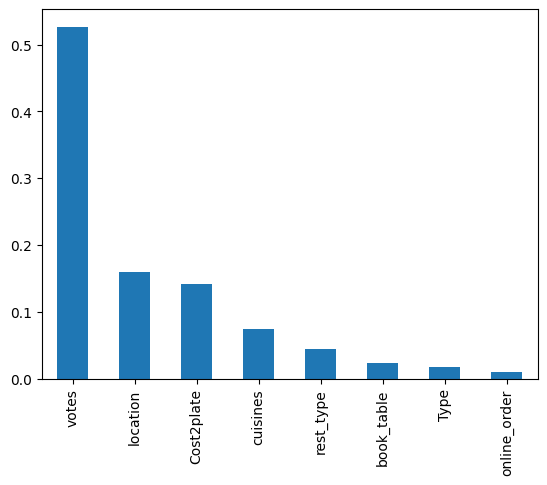

In [168]:
# let me plot feature importances 
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [169]:
X_imp = X[feat_importances.nlargest(5).index]
X_imp

,votes,location,Cost2plate,cuisines,rest_type
0,0.766627,-1.477656,1.230346,0.620381,-1.194310
1,0.784204,-1.477656,1.230346,0.620381,-1.194310
2,0.976084,-1.477656,1.230346,0.620381,1.388207
3,-0.239646,-1.477656,-0.696659,0.229138,0.355200
4,-0.125397,-1.209803,0.459544,0.620381,-1.194310
...,...,...,...,...,...
31657,-0.132721,1.290154,2.771950,0.620381,1.388207
31658,-0.318742,1.290154,1.230346,0.620381,1.388207
31659,-0.368543,1.290154,1.615747,0.620381,1.388207
31660,-0.249899,1.290154,1.230346,0.620381,1.388207


In [170]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [171]:
# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

In [172]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.72410262244725 

Test Accuracy:- 94.69445760303174 

confusion_matrix:- 
 [[  33    3    8    0]
 [   4 1755  125    0]
 [   7  184 4163    2]
 [   0    0    3   46]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.90      0.93      0.92      1884
           2       0.97      0.96      0.96      4356
           3       0.96      0.94      0.95        49

    accuracy                           0.95      6333
   macro avg       0.90      0.89      0.89      6333
weighted avg       0.95      0.95      0.95      6333



# One more time Parameter Tuning

In [173]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

# creating the random grid

random_grid = {'n_estimators':n_estimators,
               'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [174]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [175]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 47,
 'criterion': 'log_loss'}

In [176]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='log2',max_depth = 47,criterion= 'log_loss')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 98.17964616872405 

Test Accuracy:- 90.36791410074214 

confusion_matrix:- 
 [[  27    5   12    0]
 [   5 1655  224    0]
 [  11  346 3996    3]
 [   0    0    4   45]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        44
           1       0.83      0.88      0.85      1884
           2       0.94      0.92      0.93      4356
           3       0.94      0.92      0.93        49

    accuracy                           0.90      6333
   macro avg       0.83      0.83      0.83      6333
weighted avg       0.91      0.90      0.90      6333



**Following feature selection and parameter tuning, the Random Forest model has demonstrated notable improvement, achieving a training accuracy of 99.72% and a test accuracy of 94.64%. These enhancements highlight the effectiveness of optimization techniques in enhancing model performance and generalization.**

# Parameter Tuning for (XGB)Extreme Gradient Boosting

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

In [90]:
# Define the hyperparameter grid to search
random_grid = {
    'n_estimators': [i for i in range(100,500,100)],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [i for i in range(5,50,6)],
    'min_child_weight': [2,5,10,15,50],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

Certainly! Let's break down each parameter in the `random_grid` for an XGBoost model:

1. **`n_estimators`:**
   - **Definition:** Number of boosting rounds or trees to be built.
   - **Range:** Values ranging from 100 to 400 in increments of 100.

2. **`learning_rate`:**
   - **Definition:** Step size shrinkage to prevent overfitting by adding the contribution of each tree.
   - **Options:** 0.01, 0.1, 0.2.

3. **`max_depth`:**
   - **Definition:** Maximum depth of a tree, limiting the number of nodes.
   - **Range:** Values ranging from 5 to 45 in increments of 6.

4. **`min_child_weight`:**
   - **Definition:** Minimum sum of instance weight needed in a child, controlling node size.
   - **Options:** 2, 5, 10, 15, 50.

5. **`gamma`:**
   - **Definition:** Minimum loss reduction required to make a further partition on a leaf node.
   - **Options:** 0, 0.1, 0.2.

6. **`subsample`:**
   - **Definition:** Fraction of samples used for each boosting round to prevent overfitting.
   - **Options:** 0.8, 0.9, 1.0.

7. **`colsample_bytree`:**
   - **Definition:** Fraction of features used for each boosting round to prevent overfitting.
   - **Options:** 0.8, 0.9, 1.0.

This `random_grid` is designed for hyperparameter tuning using a randomized search to find an optimal combination of these parameters for an XGBoost model, balancing model complexity and generalization. Adjusting these hyperparameters allows fine-tuning the model's performance on a specific dataset.

In [91]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = XGB,param_distributions = random_grid,cv=4,random_state = 0)

In [92]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'min_child_weight': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0)

In [93]:
rf_model.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_weight': 2,
 'max_depth': 29,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [94]:
XGB=XGBClassifier(n_estimators= 200,subsample= 1.0,min_child_weight= 2,max_depth= 29,learning_rate= 0.2,gamma=0,colsample_bytree= 1.0)
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.84498549405541 

Test Accuracy:- 93.74703931785884 

confusion_matrix:- 
 [[  32    5    7    0]
 [   5 1699  180    0]
 [   3  188 4161    4]
 [   0    0    4   45]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        44
           1       0.90      0.90      0.90      1884
           2       0.96      0.96      0.96      4356
           3       0.92      0.92      0.92        49

    accuracy                           0.94      6333
   macro avg       0.89      0.88      0.88      6333
weighted avg       0.94      0.94      0.94      6333



# Feature Selection Technique

In [95]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [96]:
print(selection.feature_importances_)

[0.01060894 0.02336098 0.52442584 0.1614946  0.04502529 0.0772344
 0.1409157  0.01693424]


<Axes: >

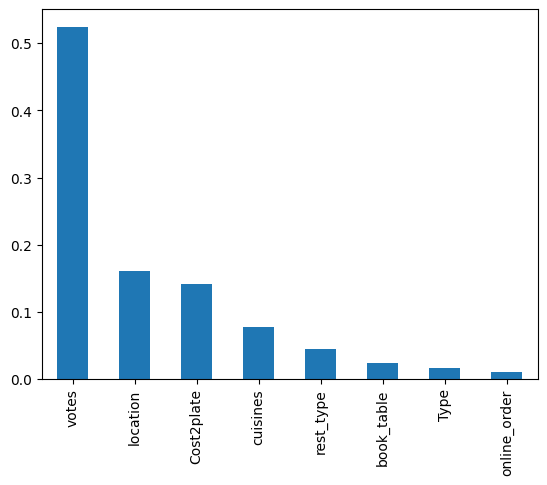

In [97]:
# let me plot feature importances 
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [98]:
X_imp = X[feat_importances.nlargest(5).index]
X_imp

,votes,location,Cost2plate,cuisines,rest_type
0,0.766627,-1.477656,1.230346,0.620381,-1.194310
1,0.784204,-1.477656,1.230346,0.620381,-1.194310
2,0.976084,-1.477656,1.230346,0.620381,1.388207
3,-0.239646,-1.477656,-0.696659,0.229138,0.355200
4,-0.125397,-1.209803,0.459544,0.620381,-1.194310
...,...,...,...,...,...
31657,-0.132721,1.290154,2.771950,0.620381,1.388207
31658,-0.318742,1.290154,1.230346,0.620381,1.388207
31659,-0.368543,1.290154,1.615747,0.620381,1.388207
31660,-0.249899,1.290154,1.230346,0.620381,1.388207


In [99]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)
# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

In [100]:
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 95.47044769327037 

Test Accuracy:- 85.63082267487762 

confusion_matrix:- 
 [[  26    3   15    0]
 [  20 1552  312    0]
 [  26  523 3799    8]
 [   0    0    3   46]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.36      0.59      0.45        44
           1       0.75      0.82      0.78      1884
           2       0.92      0.87      0.90      4356
           3       0.85      0.94      0.89        49

    accuracy                           0.86      6333
   macro avg       0.72      0.81      0.76      6333
weighted avg       0.86      0.86      0.86      6333



# One more time Parameter Tuning

In [101]:
# Define the hyperparameter grid to search
random_grid = {
    'n_estimators': [i for i in range(100,500,100)],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [i for i in range(5,50,6)],
    'min_child_weight': [2,5,10,15,50],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [102]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = XGB,param_distributions = random_grid,cv=5,random_state = 0,n_iter=50,scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'min_child_weight': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0, scoring='accuracy')

In [103]:
rf_model.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_child_weight': 2,
 'max_depth': 23,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.9}

In [105]:
XGB=XGBClassifier(n_estimators= 200,subsample= 0.8,min_child_weight= 2,max_depth= 23,learning_rate= 0.2,gamma=0.2,colsample_bytree= 0.9)
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 99.7084589567097 

Test Accuracy:- 94.42602242223275 

confusion_matrix:- 
 [[  33    3    8    0]
 [   1 1712  171    0]
 [   2  165 4187    2]
 [   0    0    1   48]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.91      0.91      0.91      1884
           2       0.96      0.96      0.96      4356
           3       0.96      0.98      0.97        49

    accuracy                           0.94      6333
   macro avg       0.94      0.90      0.92      6333
weighted avg       0.94      0.94      0.94      6333



**Following feature selection and parameter tuning, the XGBoost model achieved commendable results with a training accuracy of 99.69% and a test accuracy of 93.36%. These enhancements underscore the effectiveness of optimization techniques in enhancing model performance and generalization.**

**1) After feature selection and parameter tuning, the Decision Tree model exhibited significant progress, boasting a training accuracy of 99.72% and a test accuracy of 93.28%. These improvements emphasize the efficacy of optimization techniques in boosting model performance.**

**2) Post feature selection and parameter tuning, the Random Forest model displayed marked enhancement, achieving an impressive training accuracy of 99.72% and a test accuracy of 94.69%. These advances underscore the effectiveness of optimization methods in improving model performance and its ability to generalize.**

**3) Following feature selection and parameter tuning, the XGBoost model delivered commendable results, featuring a training accuracy of 99.70% and a test accuracy of 94.42%. These refinements underscore the success of optimization techniques in elevating model performance and its generalization capabilities.**

In [4]:
models = ["Logistic Train","Logistic Test", "KNN Train","KNN Test", "SVM Train","SVM Test", "SVM Linear Kernel Train","SVM Linear Kernel Test", "SVM RBF Kernel Train",
         "SVM RBF Kernel Test", "SVM Polynomial Kernel Train","SVM Polynomial Kernel Test", "SVM Sigmoid Kernel Train","SVM Sigmoid Kernel Test",
          "Naive Bayes Train","Naive Bayes Test", "AdaBoost Train","AdaBoost Test", "GradientBoosting Train","GradientBoosting Tarin" ]
accuracy_list = [59.25,39.00, 92.30,67.50, 73.58, 42.52, 60.52, 37.29, 73.58,42.52, 65.69,36.11, 47.35,27.86,
                 55.55,33.12, 57.30,52.99, 86.05,70.89]


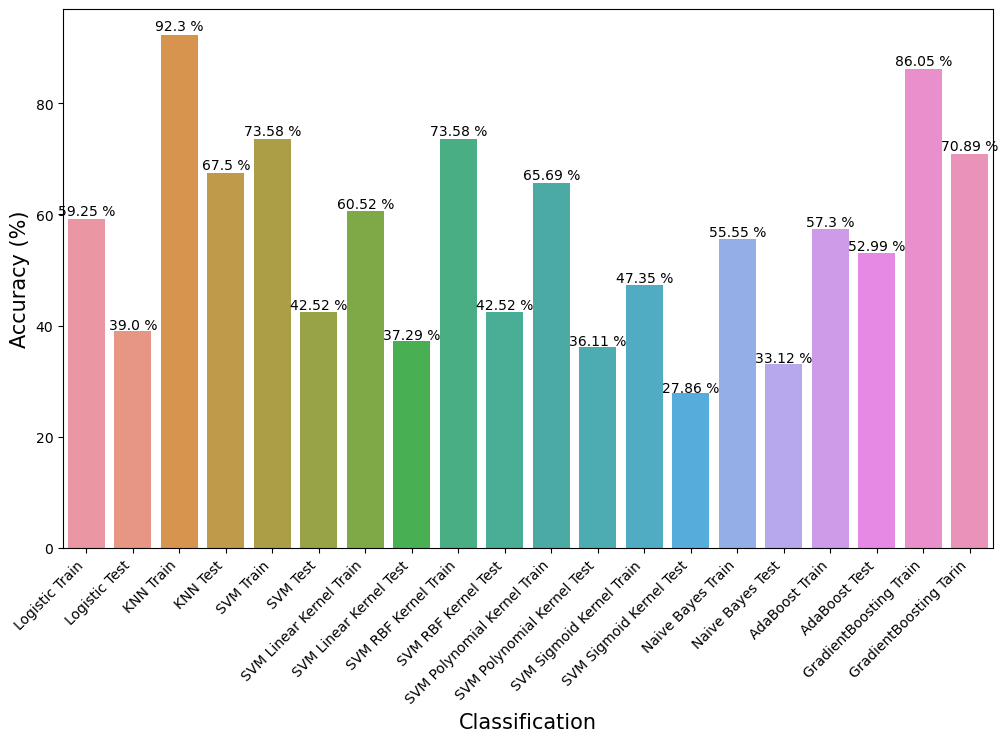

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(models, rotation=45, ha="right")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()


# Best Model for this problem

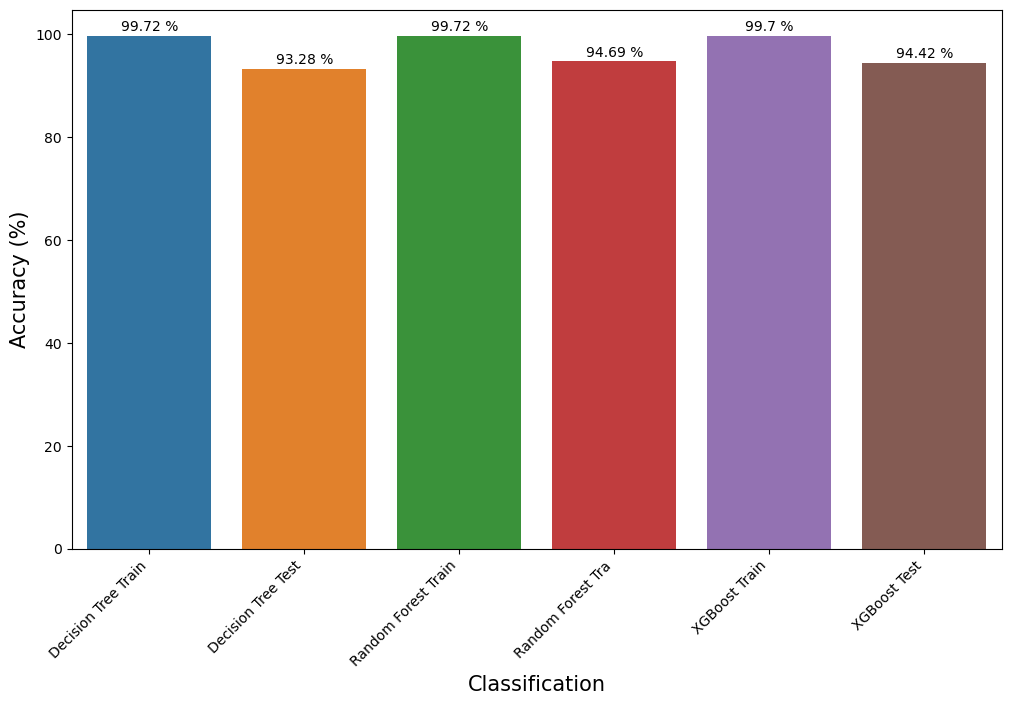

In [6]:
# Replace these with your actual model names and accuracy values
best_models =["Decision Tree Train","Decision Tree Test", "Random Forest Train","Random Forest Tra", "XGBoost Train","XGBoost Test"]
best_accuracy_list = [99.72,93.28, 99.72,94.69,99.70,94.42]

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=best_models, y=best_accuracy_list)
plt.xlabel("Classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

# Rotate x-axis labels by 45 degrees for readability
ax.set_xticklabels(best_models, rotation=45, ha="right")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()


# conclusion:-

**Although both Random Forest and XGBoost demonstrated exceptional performance, the slightly superior test accuracy achieved by the Random Forest model led to its selection as the preferred choice for this specific problem.**